In [1]:
# configuration the path of kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 89% 145M/163M [00:01<00:00, 148MB/s]
100% 163M/163M [00:01<00:00, 149MB/s]


In [3]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The Dataset is extracted")

The Dataset is extracted


**Importing Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [19]:
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')
print(with_mask_files[0:5])
print(without_mask_files[-5:])

['with_mask_2408.jpg', 'with_mask_2655.jpg', 'with_mask_217.jpg', 'with_mask_3522.jpg', 'with_mask_914.jpg']
['without_mask_292.jpg', 'without_mask_3391.jpg', 'without_mask_813.jpg', 'without_mask_2393.jpg', 'without_mask_148.jpg']


In [12]:
# Check for number of images in each class to check the balance nature
print('Number of with masked images',len(with_mask_files))
print('Number of without masked images',len(without_mask_files))

Number of with masked images 3725
Number of without masked images 3828


**Creating Lables for the two classes of image**


with mask --> 1 and without mask --> 0

In [14]:
# Create the Labels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [15]:
# make sure label count is same and merge both the list
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [17]:
# merge to form a single label
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])


7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


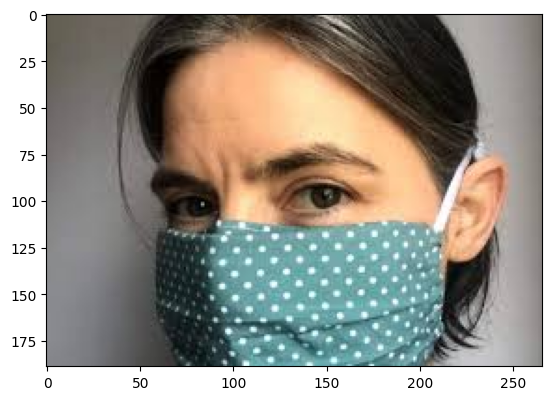

In [18]:
# Displaying with mask and without mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2408.jpg')
impplot = plt.imshow(img)
plt.show()

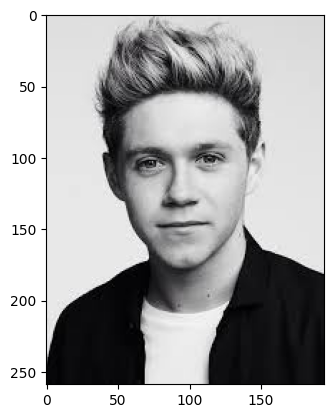

In [21]:
# Displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_3391.jpg')
impplot = plt.imshow(img)
plt.show()

**Image Processing** :-




1.   Resize the Images
2.   Convert the images into numpy array



In [22]:
# Convert images to numpy array
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB') # just to make sure there is no B/W Image
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB') # just to make sure there is no B/W Image
  image = np.array(image)
  data.append(image)

print(len(data))


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


7553


In [23]:
type(data)

list

array([[[ 98,  94,  82],
        [ 99,  95,  83],
        [100,  96,  84],
        ...,
        [130, 125, 119],
        [125, 120, 114],
        [118, 113, 107]],

       [[ 98,  94,  82],
        [ 99,  95,  83],
        [100,  96,  84],
        ...,
        [130, 125, 119],
        [125, 120, 114],
        [119, 114, 108]],

       [[ 98,  94,  82],
        [ 99,  95,  83],
        [100,  96,  84],
        ...,
        [130, 125, 119],
        [125, 120, 114],
        [119, 114, 108]],

       ...,

       [[134, 135, 140],
        [133, 134, 139],
        [132, 133, 138],
        ...,
        [152, 152, 150],
        [147, 147, 145],
        [139, 139, 137]],

       [[134, 135, 140],
        [133, 134, 139],
        [132, 133, 138],
        ...,
        [152, 152, 150],
        [147, 147, 145],
        [139, 139, 137]],

       [[134, 135, 140],
        [133, 134, 139],
        [132, 133, 138],
        ...,
        [152, 152, 150],
        [147, 147, 145],
        [140, 140, 138]]], dtype=uint8)
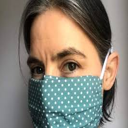

In [24]:
data[0]

In [25]:
# Converting image list and label into numpy array
X = np.array(data)
Y = np.array(labels)


In [26]:
print(type(X),type(Y))
print(X.shape,Y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(7553, 128, 128, 3) (7553,)


**Train Test Split**

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=2003,test_size=0.2)


In [28]:
print(X.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# Scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

**Building a Convolutional Neural Network**

In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu',input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation = 'sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [33]:
history = model.fit(x_train_scaled,y_train,validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - accuracy: 0.7111 - loss: 0.7704 - val_accuracy: 0.8959 - val_loss: 0.2436
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8841 - loss: 0.2851 - val_accuracy: 0.9058 - val_loss: 0.2272
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9160 - loss: 0.2195 - val_accuracy: 0.9256 - val_loss: 0.2083
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9331 - loss: 0.1674 - val_accuracy: 0.9372 - val_loss: 0.1939
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9440 - loss: 0.1595 - val_accuracy: 0.9256 - val_loss: 0.1984


**Model Evaluation**

In [37]:
loss, test_accuracy = model.evaluate(x_test_scaled,y_test)
print("Test Accuracy:",test_accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9184 - loss: 0.2044
Test Accuracy: 0.9166114926338196


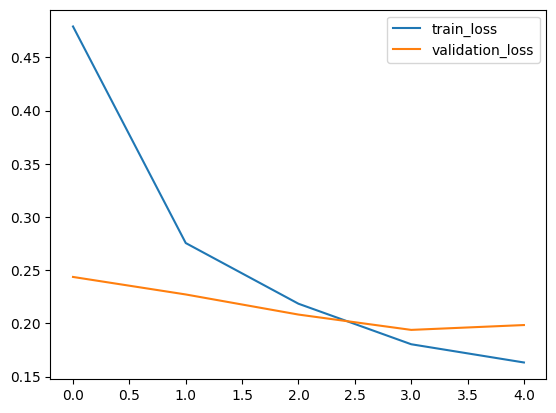

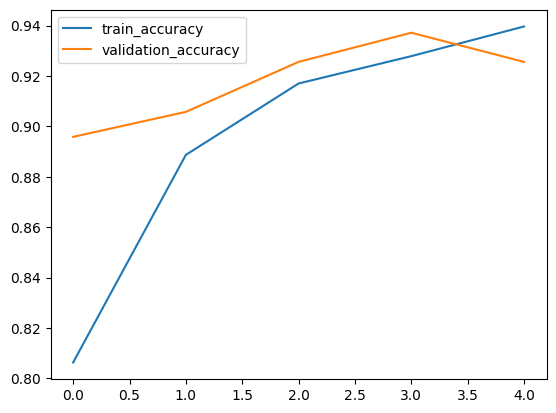

In [40]:
h = history

# plot the loss value

plt.plot(h.history['loss'],label='train_loss')
plt.plot(h.history['val_loss'],label='validation_loss')
plt.legend()
plt.show()


# plot the accuracy value

plt.plot(h.history['accuracy'],label='train_accuracy')
plt.plot(h.history['val_accuracy'],label='validation_accuracy')
plt.legend()
plt.show()


**Predictive System**

In [44]:
def func(input_image_path):
 input_image = cv2.imread(input_image_path)
 cv2_imshow(input_image)
 input_image_resized = cv2.resize(input_image, (128,128))
 input_image_scaled = input_image_resized/255
 input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])
 input_prediction = model.predict(input_image_reshaped)

 print(input_prediction)

 input_pred_label = np.argmax(input_prediction)

 print(input_pred_label)

 if input_pred_label == 1:
  print("Person is wearing a mask")
 else:
  print("Person is not wearing a mask")

In [45]:
model.save('my_model.keras')